# CAR PRICE PREDICTION
With the covid 19 impact in the market, we have seen lot of changes in the car market. Now some 
cars are in demand hence making them costly and some are not in demand hence cheaper. One 
of our clients works with small traders, who sell used cars. With the change in market due to covid 
19 impact, our client is facing problems with their previous car price valuation machine learning 
models. So, they are looking for new machine learning models from new data. We have to make 
car price valuation model. This project contains two phase
# Data Collection Phase
You have to scrape at least 5000 used cars data. You can scrape more data as well, it’s up to you. 
more the data better the model
In this section You need to scrape the data of used cars from websites (Olx, cardekho, Cars24 
etc.) You need web scraping for this. You have to fetch data for different locations. The number of
columns for data doesn’t have limit, it’s up to you and your creativity. Generally, these columns are 
Brand, model, variant, manufacturing year, driven kilometers, fuel, number of owners, location and 
at last target variable Price of the car. This data is to give you a hint about important variables in 
used car model. You can make changes to it, you can add or you can remove some columns, it 
completely depends on the website from which you are fetching the data.
Try to include all types of cars in your data for example- SUV, Sedans, Coupe, minivan, 
Hatchback.
Note – The data which you are collecting is important to us. Kindly don’t share it on any public platforms.
# Model Building Phase
After collecting the data, you need to build a machine learning model. Before model building do all 
data pre-processing steps. Try different models with different hyper parameters and select the best 
model.

## WebScrapping

In [1]:
!pip install selenium


# Importing libraries

In [2]:
import pandas as pd
import selenium
from selenium import webdriver
import time
from selenium.common.exceptions import StaleElementReferenceException, NoSuchElementException

# Scrapping Data for car 

In [3]:
driver=webdriver.Chrome("chromedriver.exe") 

In [5]:
# Creating empty list
car=[]
variant=[]
km=[]
owner=[]
tank=[]
emi=[]
price=[]
discount=[]

In [11]:
# scrapping detail
start=0
end=25
for page in range(start,end):
    cars=driver.find_elements_by_xpath("//h2[@class='_3FpCg']")
    for i in cars:
        try:
            car.append(i.text)
        except NoSuchElementException:
            car.append("-")
            
            
    var=driver.find_elements_by_xpath("//p[@class='cvakB']")
    for i in var:
        try:
            variant.append(i.text)
        except NoSuchElementException:
            variant.appne('--')
            
            
    kms=driver.find_elements_by_xpath("//ul[@class='bVR0c']/li")
    for i in kms:
        try:
            km.append(i.text)
        except NoSuchElementException:
            km.appned("--")
            
            
    
    emis=driver.find_elements_by_xpath("//div[@class='_2HFRN']")
    for i in emis:
        try:
            emi.append(i.text)
        except NoSuchElementException:
            emi.append("--")
            
            
   
            
    disc=driver.find_elements_by_xpath("//p[@class='_31Wtw']")
    for i in disc:
        try:
            discount.append(i.text)
        except NoSuchElementException:
            discount.append('--')
            
            
            
    prc=driver.find_elements_by_xpath("//div[@class='_7udZZ']")
    for i in prc:
        try:
            price.append(i.text)
        except NoSuchElementException:
            price.append("--")
        
        
            

In [44]:
discount_percentage=[]
downpayment=[]
star=0
end=25
for page in range(start,end):
    dpr=driver.find_elements_by_xpath("//div[@class='_3mZ8j']")
    for i in dpr:
        try:
            discount_percentage.append(i.text)
        except NoSuchElementException:
            discount_percentage("--")
            
            
    dp=driver.find_elements_by_xpath("//div[@class='JvSRy']/span)
    for i in dp:
        try:
            downpayment.append(i.text)
        except NoSuchElementException:
            downpayment.append("--")
            
            
        
    

In [49]:
start=0
end=25
for page in range(start,end):
    dp=driver.find_elements_by_xpath("//div[@class='JvSRy']/span")
    try:
        downpayment.append(i.text)
    except NoSuchElementException:
        downpayment.append("--")
        
            
        
    

In [54]:
# creating dataframe
df=pd.DataFrame({})
df['Car Name and Model']=car[:11000]
df['Variant']=variant[:11000]
df['Other Details']=km[:11000]
df['Discount Percentage']=discount_percentage[:11000]
df['EMI']=emi[:11000]
df['Discount']=discount[:11000]
df['Price']=price[:11000]

In [56]:
df

,Car Name and Model,Variant,Other Details,Discount Percentage,EMI,Discount,Price
0,2014 Maruti Alto 800,VXI Manual,"12,535 km","₹28,000 OFF","₹6,531/month","₹3,21,599","₹2,93,599"
1,2021 Hyundai VENUE,S MT 1.2 KAPPA,1st Owner,"₹14,000 OFF","₹17,678/month","₹8,08,699","₹7,94,699"
2,2014 Hyundai Grand i10,SPORTS 1.2 VTVT Manual,Petrol,"₹35,000 OFF","₹8,386/month","₹4,11,999","₹3,76,999"
3,2017 Maruti Alto K10,VXI Manual,"2,589 km","₹29,000 OFF","₹7,843/month","₹3,81,599","₹3,52,599"
4,2011 Maruti Alto K10,VXI Manual,1st Owner,"₹9,000 OFF","₹4,734/month","₹2,21,799","₹2,12,799"
...,...,...,...,...,...,...,...
10995,2015 Toyota Etios Liva,GD Manual,"2,723 km","₹18,000 OFF","₹10,264/month","₹5,59,199","₹4,61,399"
10996,2017 Maruti Alto 800,LXI Manual,1st Owner,"₹31,000 OFF","₹6,466/month","₹3,94,699","₹2,90,699"
10997,2013 Maruti Ritz,VXI BS IV Manual,Petrol,"₹24,000 OFF","₹6,075/month","₹4,00,999","₹2,73,099"
10998,2010 Maruti Alto,LXI Manual,"2,147 km","₹5,000 OFF","₹3,526/month","₹4,12,499","₹1,58,499"


In [57]:
# saving Dataframe into csv
df.to_csv('car_price.csv')

## Model Building Phase
## Importing Libraries

In [5]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

## Loading the Dataset

In [6]:
df=pd.read_csv('car_price.csv')
df.head()

,Unnamed: 0,Car Name and Model,Variant,Other Details,Discount Percentage,EMI,Discount,Price
0,0,2014 Maruti Alto 800,VXI Manual,"12,535 km","₹28,000 OFF","₹6,531/month","₹3,21,599","₹2,93,599"
1,1,2021 Hyundai VENUE,S MT 1.2 KAPPA,1st Owner,"₹14,000 OFF","₹17,678/month","₹8,08,699","₹7,94,699"
2,2,2014 Hyundai Grand i10,SPORTS 1.2 VTVT Manual,Petrol,"₹35,000 OFF","₹8,386/month","₹4,11,999","₹3,76,999"
3,3,2017 Maruti Alto K10,VXI Manual,"2,589 km","₹29,000 OFF","₹7,843/month","₹3,81,599","₹3,52,599"
4,4,2011 Maruti Alto K10,VXI Manual,1st Owner,"₹9,000 OFF","₹4,734/month","₹2,21,799","₹2,12,799"


Top 5 heads of the datasets.

# EDA

In [7]:
# checking shape
df.shape

(11000, 8)

we have 11000 rows and 8 columns in the dataset.

In [8]:
# checking datatype
df.dtypes

Unnamed: 0              int64
Car Name and Model     object
Variant                object
Other Details          object
Discount Percentage    object
EMI                    object
Discount               object
Price                  object
dtype: object

7 object type columns and 1 integer type columns present in the dataset.

In [9]:
# checking null values
df.isnull().sum()

Unnamed: 0             0
Car Name and Model     0
Variant                0
Other Details          0
Discount Percentage    0
EMI                    0
Discount               0
Price                  0
dtype: int64

Null values are not present in the dataset.

In [13]:
# deleting unnecessary column 
del df['Unnamed: 0']

In [14]:
# Label Encoding to convert object column into numerical column for further analysis
from sklearn.preprocessing import LabelEncoder

enc =LabelEncoder()

for i in df.columns:
    if df[i].dtypes=='object':
        df[i]=enc.fit_transform(df[i].values.reshape(-1,1))

In [15]:
df

,Car Name and Model,Variant,Other Details,Discount Percentage,EMI,Discount,Price
0,86,154,26,20,299,158,161
1,202,109,69,5,131,429,488
2,83,116,524,28,417,267,279
3,141,154,73,21,383,234,245
4,32,154,69,54,199,46,59
...,...,...,...,...,...,...,...
10995,116,71,74,9,12,377,366
10996,140,86,69,24,295,247,157
10997,69,153,524,16,271,256,133
10998,19,86,70,40,163,268,15


now the columns has been converted into numeric format.

## visualization of data through distribution plot

<AxesSubplot:xlabel='Car Name and Model', ylabel='Density'>

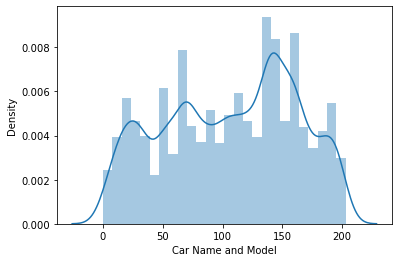

In [17]:
sns.distplot(df['Car Name and Model'])

Car Name and Model column is looking somehow normally distributed in the ranges between 0 to 200.

<AxesSubplot:xlabel='Variant', ylabel='Density'>

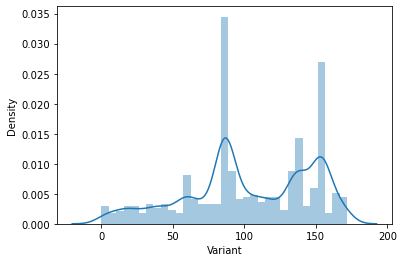

In [18]:
sns.distplot(df['Variant'])

Variant column is showing the cars are availble in different Variant.

<AxesSubplot:xlabel='Discount Percentage', ylabel='Density'>

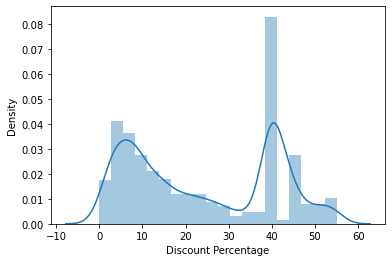

In [20]:
sns.distplot(df['Discount Percentage'])

Discount Percentage column is showing the offers in two different groups and between 0 to 30 is more than the 35 to spprox 60.

<AxesSubplot:xlabel='EMI', ylabel='Density'>

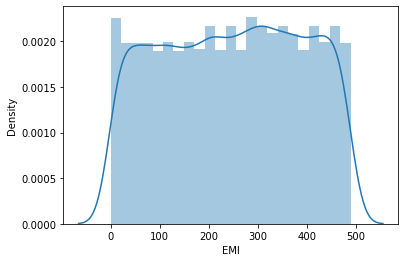

In [21]:
sns.distplot(df['EMI'])

EMI column is looking normally distributed.

<AxesSubplot:xlabel='Discount', ylabel='Density'>

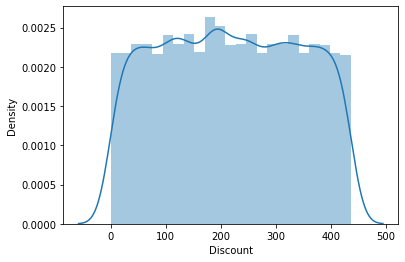

In [22]:
sns.distplot(df['Discount'])

Discount column is looking normally distributed.

<AxesSubplot:xlabel='Price', ylabel='Density'>

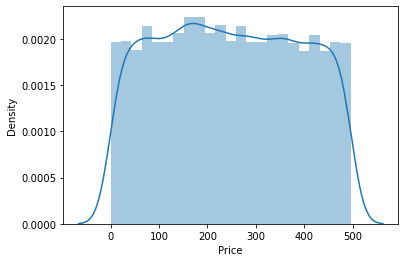

In [23]:
sns.distplot(df['Price'])

Price column is looking normally distributed.

## Checking Outliers

Car Name and Model         AxesSubplot(0.125,0.71587;0.352273x0.16413)
Variant                 AxesSubplot(0.547727,0.71587;0.352273x0.16413)
Other Details             AxesSubplot(0.125,0.518913;0.352273x0.16413)
Discount Percentage    AxesSubplot(0.547727,0.518913;0.352273x0.16413)
EMI                       AxesSubplot(0.125,0.321957;0.352273x0.16413)
Discount               AxesSubplot(0.547727,0.321957;0.352273x0.16413)
Price                        AxesSubplot(0.125,0.125;0.352273x0.16413)
dtype: object

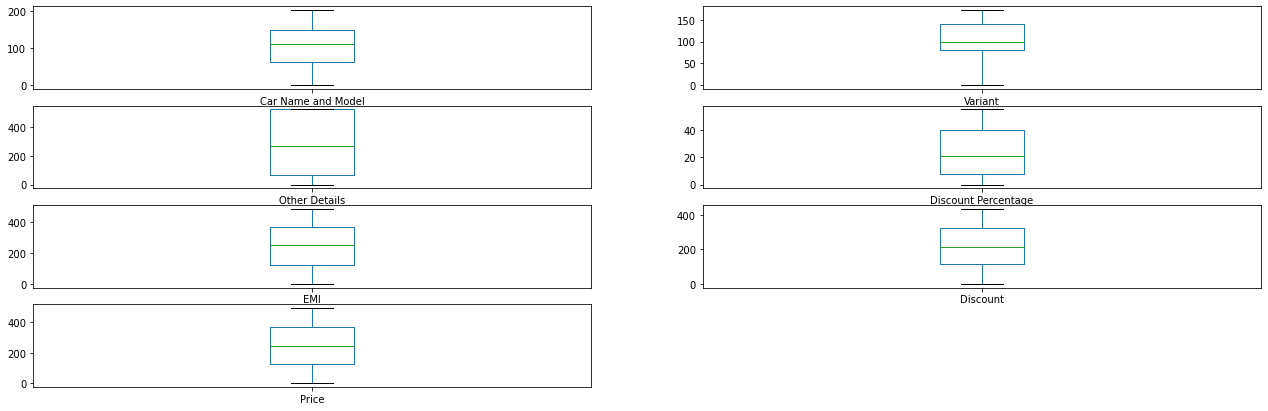

In [24]:
df.plot(kind='box',subplots=True, layout=(4,2), figsize=(22,7))

Outliers are not present in any of the columns.

## Statistical Summary

In [25]:
df.describe()

,Car Name and Model,Variant,Other Details,Discount Percentage,EMI,Discount,Price
count,11000.000000,11000.000000,11000.000000,11000.000000,11000.000000,11000.000000,11000.00000
mean,106.076636,102.557273,291.089727,24.142818,246.213364,217.422909,246.28100
std,54.966583,43.635898,200.660155,16.652867,141.288701,124.440598,141.69406
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000
25%,62.000000,81.000000,69.000000,8.000000,124.000000,112.000000,126.00000
50%,111.000000,98.000000,267.000000,21.000000,250.000000,216.000000,243.00000
75%,149.250000,139.000000,524.000000,40.000000,367.250000,325.000000,367.00000
max,203.000000,172.000000,524.000000,55.000000,489.000000,436.000000,496.00000


Number of values are same in every column.

Not much difference between mean and median in any of the column.

Data is not much deviated.

Not much difference between 75% and max in any of the column.

## Correlation matrix

<AxesSubplot:>

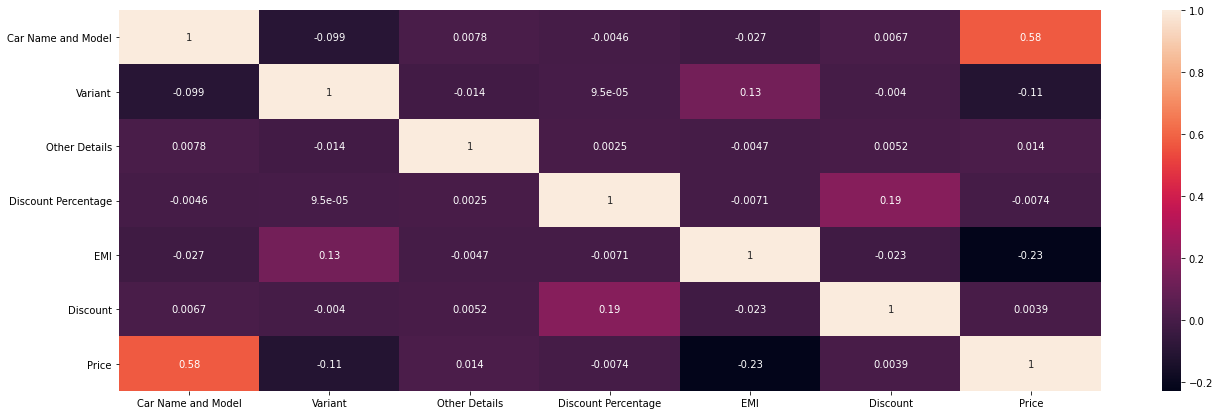

In [26]:
plt.figure(figsize=(22,7))
sns.heatmap(df.corr(),annot=True)

Car Name and model column is positively correlated with target column Price.

EMI column is negatively correlated with the target column Price.

## Splitting the dataset

In [28]:
x=df.drop('Price',axis=1)
y=df['Price']

In [29]:
x.shape

(11000, 6)

In [30]:
y.shape

(11000,)

## Lets bring all features to a common scale

In [41]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()

x=sc.fit_transform(df)

x=pd.DataFrame(x,columns=df.columns)

## Train Test Split

In [42]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.20,random_state=47)
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(8800, 7)
(2200, 7)
(8800,)
(2200,)


## Model building

In [43]:
from sklearn.linear_model import LinearRegression , Lasso, Ridge, ElasticNet
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
from sklearn.model_selection import cross_val_score


In [44]:
# for Linear Regression
lr=LinearRegression()
lr.fit(x_train,y_train)
pred_y=lr.predict(x_test)
print('r2 score',r2_score(y_test,pred_y))

print('error')
print('mean absolute error',mean_absolute_error(y_test,pred_y))
print('mean squared error',mean_squared_error(y_test,pred_y))
print('root mean squared error',np.sqrt(mean_squared_error(y_test,pred_y)))

r2 score 1.0
error
mean absolute error 9.987001125079008e-14
mean squared error 1.6163306711531168e-26
root mean squared error 1.2713499404778832e-13


In [45]:
# cross validation 
score=cross_val_score(lr,x,y,cv=10)
print('cv score',np.mean(score))

cv score 1.0


Both r2 score  and cv score is 100% , so data is over fitted.

In [48]:
# for Lasso

ls=Lasso()

ls.fit(x_train,y_train)
pred_y=ls.predict(x_test)
print('r2 score',r2_score(y_test,pred_y))

print('error')
print('mean absolute error', mean_absolute_error(y_test,pred_y))
print('mean squared error', mean_squared_error(y_test,pred_y))

print('root mean squared error', np.sqrt(mean_squared_error(y_test,pred_y)))


r2 score 0.9999501805042103
error
mean absolute error 0.8592222696470111
mean squared error 0.9973968244184441
root mean squared error 0.9986975640395065


In [50]:
# cross validation of Lasso
score=cross_val_score(ls,x,y,cv=10)
print('cv score',np.mean(score))

cv score 0.9999501824984094


Both r2 score and cv score is 99%.

In [51]:
# for Ridge
rd=Ridge()
rd.fit(x_train,y_train)
pred_y=rd.predict(x_test)
print('r2 score',r2_score(y_test,pred_y))

print('error')
print('mean absolute error',mean_absolute_error(y_test,pred_y))
print('mean squared error',mean_squared_error(y_test,pred_y))
print('root mean squared error',np.sqrt(mean_squared_error(y_test,pred_y)))

r2 score 0.9999999801785396
error
mean absolute error 0.016560551353461093
mean squared error 0.00039682982150776255
root mean squared error 0.01992058788057628


In [52]:
# cross validation ridge
score=cross_val_score(rd,x,y,cv=10)
print('cv score',np.mean(score))

cv score 0.9999999835401752


Both r2 score and cv score is 99%

In [53]:
# for ElasticNet
en=ElasticNet()
en.fit(x_train,y_train)
pred_y=en.predict(x_test)
print('r2 score',r2_score(y_test,pred_y))

print('error')
print('mean absolute error',mean_absolute_error(y_test,pred_y))
print('mean squared error',mean_squared_error(y_test,pred_y))
print('root mean squared error',np.sqrt(mean_squared_error(y_test,pred_y)))

r2 score 0.8950138985579602
error
mean absolute error 39.38031655101981
mean squared error 2101.843917253328
root mean squared error 45.84587132178129


In [55]:
# cross validation ElasticNet
score=cross_val_score(en,x,y,cv=10)
print('cv score',np.mean(score))

cv score 0.8920393654493817


r2 score is 89.50 and cv score is 89.20.

## Hyper Parameter Tuning

In [56]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV

In [58]:
parameters={'criterion':['mse','mae'],'max_features':['auto','sqrt','log'],'max_depth':[0,5]}
rf=RandomForestRegressor()
clf=GridSearchCV(rf,parameters)
clf.fit(x_train,y_train)
print(clf.best_params_)

{'criterion': 'mae', 'max_depth': 5, 'max_features': 'auto'}


In [63]:
rf=RandomForestRegressor(criterion='mae',max_features='auto',max_depth=5)
rf.fit(x_train,y_train)
rf.score(x_train,y_train)
pred_decision=rf.predict(x_test)

rfs=r2_score(y_test,pred_decision)
print('r2 score',rfs*100)

rfscore=cross_val_score(rf,x,y,cv=5)
rfc=rfscore.mean()
print('cv score', rfc*100)


r2 score 99.95930931496511
cv score 99.964565936423


So after Hyper Paremeter Tuning of the model I am getting 99.95% r2 score and 99.96% cross validation score from RandomForestRegressor, So I am taking it as a best suited model.

## Saving the model

In [64]:
import pickle
filename='car_price_pred.pkl'
pickle.dump(rf,open(filename,'wb'))

## conclusion

In [67]:
loaded_model=pickle.load(open('car_price_pred.pkl','rb'))
result=loaded_model.score(x_test,y_test)
print(result)

0.9995930931496511


In [68]:
conclusion=pd.DataFrame([loaded_model.predict(x_test)[:],pred_decision[:]],index=['predicted','original'])
conclusion

,0,1,2,3,4,5,6,7,8,9,...,2190,2191,2192,2193,2194,2195,2196,2197,2198,2199
predicted,227.23,488.265,101.655,408.305,102.265,358.45,101.655,180.77,165.44,381.47,...,202.39,332.03,488.265,336.9,69.0,275.18,274.395,102.265,457.695,224.675
original,227.23,488.265,101.655,408.305,102.265,358.45,101.655,180.77,165.44,381.47,...,202.39,332.03,488.265,336.9,69.0,275.18,274.395,102.265,457.695,224.675
